## Model Training

In [18]:
# base modules
import pandas as pd
import numpy as np
from pathlib import Path
import logging
from collections import OrderedDict

# for manipulating data
import math
import dill

# for Machine Learning
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, train_test_split

# for visualization
from matplotlib import pyplot as plt

from eclyon.transforms import process_df, split_vals

In [15]:
df = pd.read_csv('cleaned_restaurant_inspection_data_2.csv')
pd.concat([df.head(), df.tail()])

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,ACTION,VIOLATION CODE,...,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location,inspection_year,inspection_month,inspection_weekday
0,50070543,CLARO,Manhattan,284,3 AVENUE,10010.0,3477213126,Mexican,Violations were cited in the following area(s).,02B,...,106.0,2.0,6800.0,1018020.0,1.008780e+09,MN21,POINT (-73.98353061908 40.73831623132),2022,9,4
1,41708524,REICHENBACH HALL,Manhattan,5,WEST 37 STREET,10018.0,2123027744,German,Violations were cited in the following area(s).,09B,...,105.0,4.0,8400.0,1080734.0,1.008390e+09,MN17,POINT (-73.983744126629 40.750585348897),2024,5,3
2,41086967,IL SOLE,Manhattan,229233,DYCKMAN STREET,NaN,2125440406,Italian,Violations were cited in the following area(s).,02B,...,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,2024,1,3
3,50070454,Sushi Q,Bronx,1610,CROSBY AVENUE,10461.0,7188221627,Japanese,Establishment re-opened by DOHMH.,NaN,...,210.0,13.0,26602.0,2098281.0,2.041680e+09,BX10,POINT (-73.830521390885 40.844216634976),2024,6,0
4,41486460,RIVER DELI,Brooklyn,2834,COLUMBIA PLACE,NaN,7182549200,Italian,Violations were cited in the following area(s).,04L,...,NaN,NaN,NaN,NaN,3.000000e+00,NaN,NaN,2024,6,3
275284,41658103,CHOP-SHOP,Manhattan,254,10 AVENUE,10001.0,2128200333,Asian/Asian Fusion,Violations were cited in the following area(s).,10H,...,104.0,3.0,9300.0,1012823.0,1.007220e+09,MN13,POINT (-74.003374516952 40.748763929496),2023,1,2
275285,50096822,SOHO THAI,Manhattan,141,GRAND STREET,10013.0,2129668916,Thai,Violations were cited in the following area(s).,06C,...,102.0,1.0,4500.0,1003045.0,1.002330e+09,MN24,POINT (-73.999502156932 40.720240386394),2024,2,1
275286,50016367,EL MANATIAL,Queens,104-21,ROOSEVELT AVENUE,11368.0,7185050250,Latin American,Violations were cited in the following area(s).,08A,...,403.0,21.0,40300.0,4307628.0,4.017760e+09,QN26,POINT (-73.860725144918 40.750139665657),2025,8,3
275287,41236413,DUNKIN,Brooklyn,1575,FLATBUSH AVENUE,11210.0,3474057014,Donuts,Violations were cited in the following area(s).,02G,...,314.0,45.0,78600.0,3205908.0,3.075580e+09,BK42,POINT (-73.947175876843 40.632384405769),2025,3,1
275288,50091847,DUNKIN,Queens,13801,QUEENS BLVD,11435.0,5164727100,Donuts,Violations were cited in the following area(s).,02G,...,408.0,24.0,21400.0,4206515.0,4.096490e+09,QN35,POINT (-73.818517087227 40.708708730287),2025,7,1


In [16]:
X, y, nas = process_df(df, y_field = 'SCORE')

In [17]:
pd.concat([X.head(), X.tail()])

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,ACTION,VIOLATION CODE,...,inspection_month,inspection_weekday,ZIPCODE_na,Latitude_na,Longitude_na,Community Board_na,Council District_na,Census Tract_na,BIN_na,BBL_na
0,50070543,4127,3,3655,164,10010.0,7126,57,5,2,...,9,4,False,False,False,False,False,False,False,False
1,41708524,15542,3,5433,2108,10018.0,1143,38,5,54,...,5,3,False,False,False,False,False,False,False,False
2,41086967,8651,3,2963,846,11101.0,2287,49,5,2,...,1,3,True,False,False,True,True,True,True,False
3,50070454,17820,1,1707,790,10461.0,18288,50,3,0,...,6,0,False,False,False,False,False,False,False,False
4,41486460,15716,2,3652,747,11101.0,12377,49,5,27,...,6,3,True,False,False,True,True,True,True,False
275284,41658103,3927,3,3335,4,10001.0,3755,5,5,65,...,1,2,False,False,False,False,False,False,False,False
275285,50096822,16992,3,1210,1179,10013.0,4476,87,5,42,...,2,1,False,False,False,False,False,False,False,False
275286,50016367,5823,4,151,1776,11368.0,15401,54,5,50,...,8,3,False,False,False,False,False,False,False,False
275287,41236413,5468,2,1611,1107,11210.0,5884,28,5,6,...,3,1,False,False,False,False,False,False,False,False
275288,50091847,5468,4,1134,1714,11435.0,8329,28,5,6,...,7,1,False,False,False,False,False,False,False,False


### Divide the training set and the test set

In [6]:
n_total = len(df)
print('full number of data points : {}'.format(n_total))

full number of data points : 275289


In [19]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape)
print("validation set size:", X_valid.shape)

Training set size: (220231, 33)
validation set size: (55058, 33)


### 1. The random forest model

In [20]:
def rmse(y_gold, y_pred): 
    return math.sqrt(((y_gold - y_pred)**2).mean())

In [21]:
def print_score(m, X_train, y_train, X_valid, y_valid):
    print('RMSE on train set: {:.4f}'.format(rmse(m.predict(X_train), y_train)))
    print('RMSE on valid set: {:.4f}'.format(rmse(m.predict(X_valid), y_valid)))
    print('R^2 on train set: {:.4f}'.format(m.score(X_train, y_train)))
    print('R^2 on valid set: {:.4f}'.format(m.score(X_valid, y_valid)))
    if hasattr(m, 'oob_score_'): print('R^2 on oob set: {:.4f}'.format(m.oob_score_))
    return

In [10]:
model_1 = RandomForestRegressor(
    n_estimators = 800, 
    criterion = 'squared_error', 
    
    # stoping criteria
    max_depth = 15,
    min_samples_split = 2, 
    min_samples_leaf = 1,
    min_weight_fraction_leaf = 0.0, 
    max_leaf_nodes = None, 
    min_impurity_decrease = 0.0, 
    ccp_alpha = 0.0, 
 
    # bagging parameters
    max_features = 0.5, 
    bootstrap = True,
    oob_score = True, 
    max_samples = None,
    
    # other
    warm_start = False, 
    n_jobs = -1,
    random_state = 42,
    verbose = 0, 
)

model_1.fit(X_train, y_train)
print_score(model_1, X_train, y_train, X_valid, y_valid)

RMSE on train set: 12.8350
RMSE on valid set: 14.0666
R^2 on train set: 0.5340
R^2 on valid set: 0.4305
R^2 on oob set: 0.4347


In [22]:
model_2 = RandomForestRegressor(
    n_estimators = 500, 
    criterion = 'squared_error', 
    
    # stoping criteria
    max_depth = 25,
    min_samples_split = 20, 
    min_samples_leaf = 10,
 
    # bagging parameters
    max_features = 0.5, 
    bootstrap = True,
    oob_score = True, 
    
    # other
    n_jobs = -1,
    random_state = 42,
    verbose = 0, 
)

model_2.fit(X_train, y_train)
print_score(model_2, X_train, y_train, X_valid, y_valid)

RMSE on train set: 11.2133
RMSE on valid set: 13.4877
R^2 on train set: 0.6443
R^2 on valid set: 0.4764
R^2 on oob set: 0.4780


In [25]:
model_3 = RandomForestRegressor(
    n_estimators=500,
    criterion='squared_error',
    
    max_depth=20,             
    min_samples_leaf=50,     
    max_samples=0.5,          
    
    max_features=0.33,        
    
    min_samples_split=20,    
    
    bootstrap=True,
    oob_score=True,

    n_jobs=-1,
    random_state=42,
    verbose=0
)

model_3.fit(X_train, y_train)
print_score(model_3, X_train, y_train, X_valid, y_valid)

RMSE on train set: 14.7734
RMSE on valid set: 14.9989
R^2 on train set: 0.3826
R^2 on valid set: 0.3526
R^2 on oob set: 0.3502


In [23]:
trees = model_2.estimators_
point = [X_valid.iloc[0, :]]
preds = np.asarray([tree.predict(point) for tree in trees])
# all tree predictions on all data
preds = np.stack([tree.predict(X_valid) for tree in model_2.estimators_]) # or np.asarray()

# predictions of the 10 trees, mean, and actual value (for first point in validation set)
preds[:,0], model_2.predict(point)[0], np.mean(preds[:,0]), y_valid[0]

/opt/miniconda3/envs/ecl-course-2025/lib/python3.11/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/miniconda3/envs/ecl-course-2025/lib/python3.11/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/miniconda3/envs/ecl-course-2025/lib/python3.11/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/miniconda3/envs/ecl-course-2025/lib/python3.11/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/miniconda3/envs/ecl-course-2025/lib/python3.11/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but DecisionTreeRegressor 

(array([ 69.07692308,  50.66666667,  59.85185185,  47.46666667,
         48.27777778, 103.28571429,  49.36363636,  47.81818182,
         51.94594595,  58.8       ,  53.46153846,  51.76666667,
         83.46153846,  73.46875   ,  49.84210526,  58.45454545,
         50.64516129,  73.25925926,  68.04347826,  40.        ,
         53.64516129,  61.10344828,  49.375     ,  44.68      ,
         48.25714286,  52.37931034,  53.85714286,  60.3125    ,
         75.37931034,  54.33333333,  41.71428571,  43.89473684,
         77.68181818,  60.33333333,  80.51724138,  45.78571429,
         47.08333333,  86.44444444,  42.77272727,  51.23076923,
         59.45      ,  79.05555556,  85.71428571,  60.31428571,
         56.83333333,  62.53333333,  50.28571429,  52.7       ,
         47.65      ,  55.88235294,  45.72727273,  48.34782609,
         52.4516129 ,  40.95833333,  60.04      ,  45.36842105,
         46.42857143,  50.23809524,  56.3125    ,  46.52173913,
         48.25      ,  45.55555556,  50.

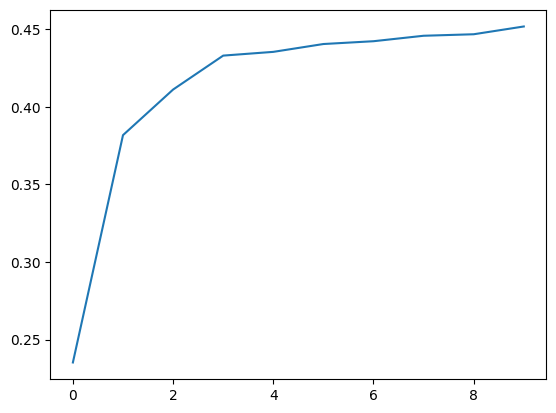

In [24]:
plt.plot([
    metrics.r2_score(y_valid, np.mean(preds[:num_trees], axis = 0)) 
    for num_trees in range(1, 11)
])

### Feature important

The importance of built-in features

ACTION: 0.3193
CAMIS: 0.0807
VIOLATION CODE: 0.0676
DBA: 0.0435
PHONE: 0.0416
BUILDING: 0.0371
INSPECTION TYPE: 0.0329
STREET: 0.0319
CUISINE DESCRIPTION: 0.0311
VIOLATION DESCRIPTION: 0.0296
inspection_year: 0.0295
Latitude: 0.0292
BIN: 0.0284
Census Tract: 0.0261
inspection_month: 0.0236
BBL: 0.0234
Longitude: 0.0222
Location: 0.0220
ZIPCODE: 0.0191
NTA: 0.0176
inspection_weekday: 0.0133
CRITICAL FLAG: 0.0105
Council District: 0.0100
Community Board: 0.0087
BORO: 0.0008
BIN_na: 0.0001
Community Board_na: 0.0000
BBL_na: 0.0000
ZIPCODE_na: 0.0000
Council District_na: 0.0000
Census Tract_na: 0.0000
Latitude_na: 0.0000
Longitude_na: 0.0000


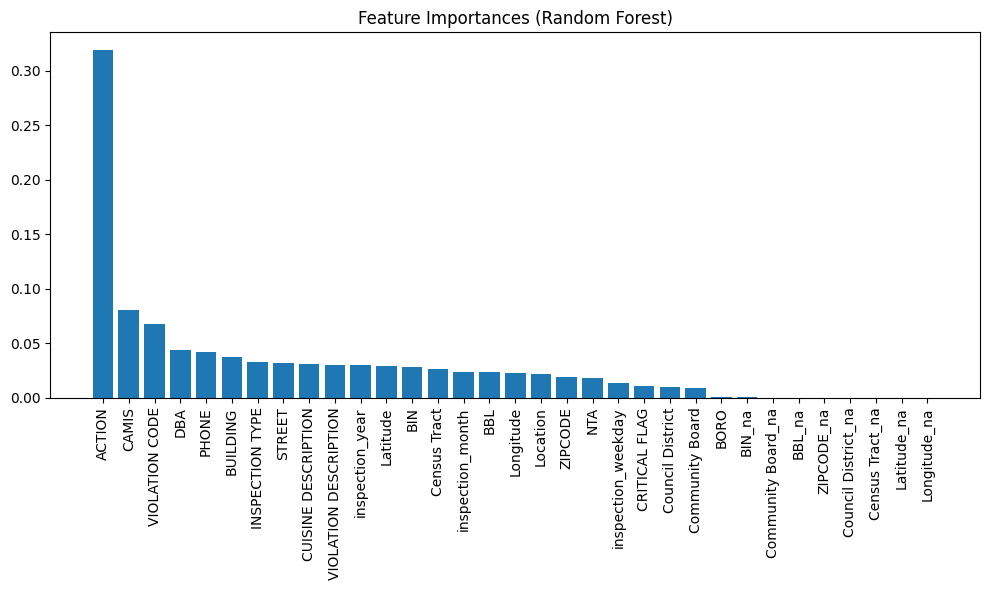

In [26]:
model_2.fit(X_train, y_train)

importances = model_2.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print(f"{X_train.columns[indices[f]]}: {importances[indices[f]]:.4f}")

plt.figure(figsize=(10,6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

Permutation Importance

/var/folders/5y/b6cqgch533773c9dm5spwwx00000gn/T/ipykernel_80266/3557422422.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(r.importances[sorted_idx].T, vert=False, labels=X_valid.columns[sorted_idx])


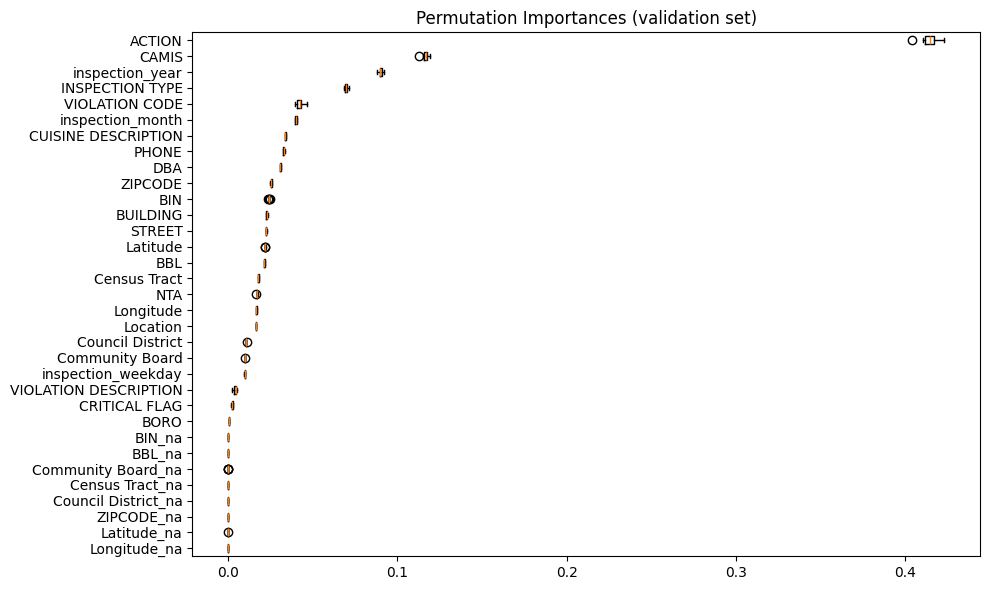

In [27]:
r = permutation_importance(model_2, X_valid, y_valid, n_repeats=10, random_state=42)

sorted_idx = r.importances_mean.argsort()

plt.figure(figsize=(10,6))
plt.boxplot(r.importances[sorted_idx].T, vert=False, labels=X_valid.columns[sorted_idx])
plt.title("Permutation Importances (validation set)")
plt.tight_layout()
plt.show()

In [112]:
bool_filter = r.importances_mean > 0.005
bool_filter

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False])

the Spearman rank-order correlation matrix 

In [103]:
len(X.columns)

20

In [106]:
X.columns

Index(['BORO', 'ZIPCODE', 'CUISINE DESCRIPTION', 'ACTION', 'VIOLATION CODE',
       'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'INSPECTION TYPE', 'Latitude',
       'Longitude', 'Council District', 'Census Tract', 'inspection_year',
       'inspection_month', 'inspection_weekday', 'ZIPCODE_na', 'Latitude_na',
       'Longitude_na', 'Council District_na', 'Census Tract_na'],
      dtype='object')

In [107]:
cols = X.columns.tolist()